### Introduction to Linear Regression

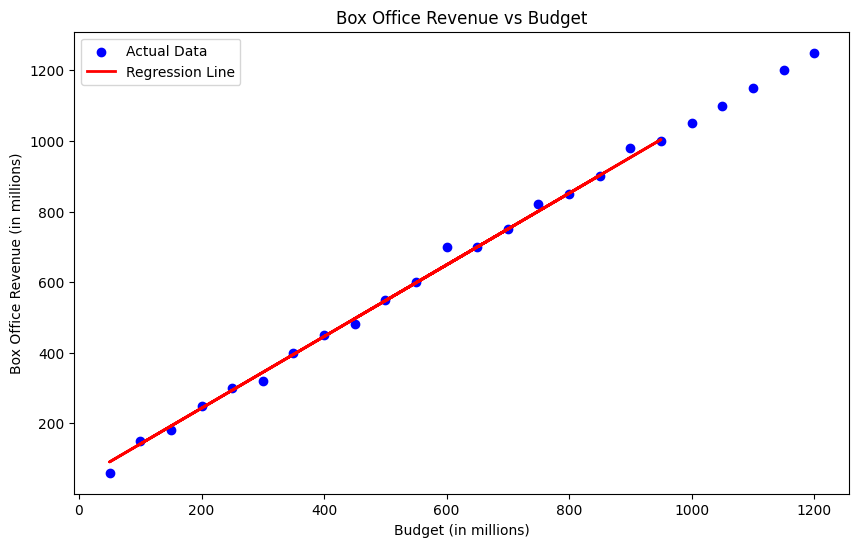

Intercept (β0): 39.97524752475226
Slope (β1): 1.014851485148515


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Step 1: Create an Expanded Dataset
data = {
    'Budget': [50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000, 1050, 1100, 1150, 1200],
    'Box_Office': [60, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000, 1050, 1100, 1150, 1200, 1250]
}

# Adding some variations and outliers
data['Box_Office'][2] = 180  # Lower than expected
data['Box_Office'][5] = 320  # Lower than expected
data['Box_Office'][8] = 480  # Lower than expected
data['Box_Office'][11] = 700  # Higher than expected
data['Box_Office'][14] = 820  # Higher than expected
data['Box_Office'][17] = 980  # Higher than expected

df = pd.DataFrame(data)

# Convert categorical data to numerical (if any)
# In this case, we don't have categorical data

# Features and target variable
X = df[['Budget']]
y = df['Box_Office']

# Step 2: Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Perform Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting the test set results
y_pred = model.predict(X_test)

# Step 4: Plot the Results
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.title('Box Office Revenue vs Budget')
plt.xlabel('Budget (in millions)')
plt.ylabel('Box Office Revenue (in millions)')
plt.legend()
plt.show()

# Print the coefficients
print(f"Intercept (β0): {model.intercept_}")
print(f"Slope (β1): {model.coef_[0]}")

In [17]:
# Given budget
budget = 160

# Using the model's intercept and coefficient to predict the box office revenue
predicted_box_office = model.intercept_ + model.coef_[0] * budget
print(f"Predicted Box Office Revenue for a 160 million budget: {predicted_box_office:.2f} million")

Predicted Box Office Revenue for a 160 million budget: 202.35 million


/home/codespace/.local/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


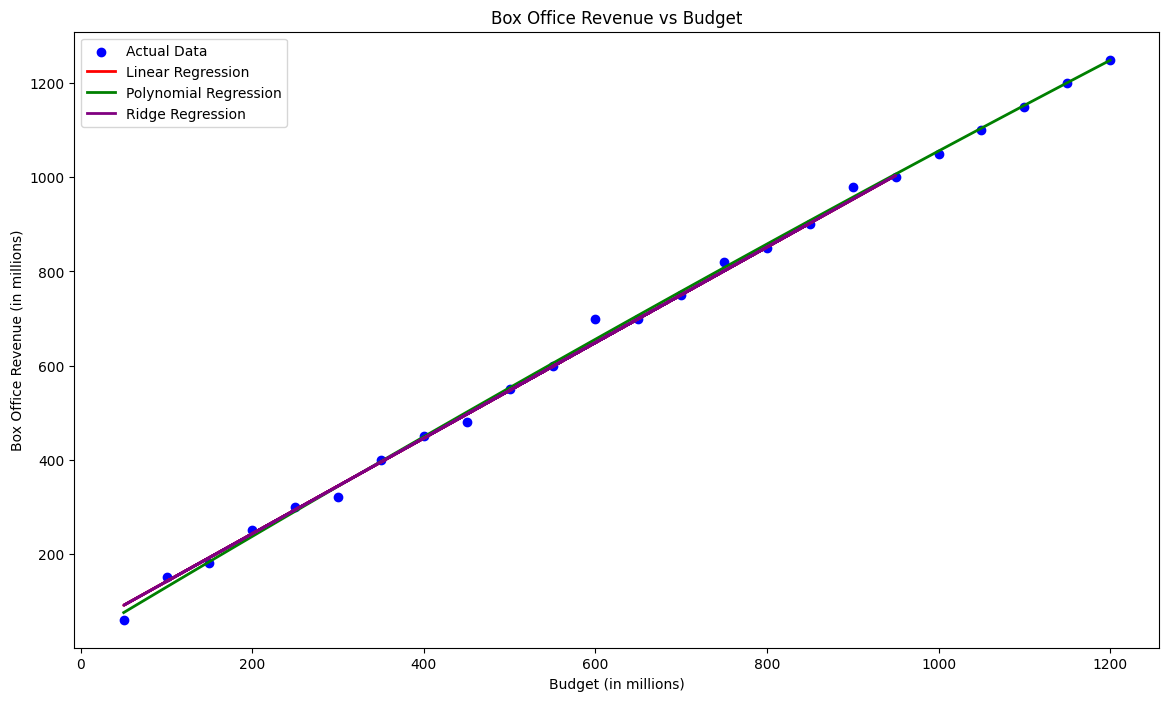

Linear Regression Intercept (β0): 39.97524752475226
Linear Regression Slope (β1): 1.014851485148515
Polynomial Regression Intercept (β0): 20.659620172166115
Polynomial Regression Coefficients: [ 0.00000000e+00  1.09448574e+00 -5.91836594e-05]
Ridge Regression Intercept (β0): 39.975586645749104
Ridge Regression Slope (β1): 1.0148509827470384


In [18]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

df = pd.DataFrame(data)

# Features and target variable
X = df[['Budget']]
y = df['Box_Office']

# Step 2: Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Perform Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# Step 4: Perform Polynomial Regression
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.3, random_state=42)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train_poly)
y_pred_poly = poly_model.predict(X_test_poly)

# Step 5: Perform Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

# Step 6: Plot the Results
plt.figure(figsize=(14, 8))
plt.scatter(X, y, color='blue', label='Actual Data')

# Linear Regression Line
plt.plot(X_test, y_pred_linear, color='red', linewidth=2, label='Linear Regression')

# Polynomial Regression Line
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_range_poly = poly_features.transform(X_range)
y_range_poly = poly_model.predict(X_range_poly)
plt.plot(X_range, y_range_poly, color='green', linewidth=2, label='Polynomial Regression')

# Ridge Regression Line
plt.plot(X_test, y_pred_ridge, color='purple', linewidth=2, label='Ridge Regression')

plt.title('Box Office Revenue vs Budget')
plt.xlabel('Budget (in millions)')
plt.ylabel('Box Office Revenue (in millions)')
plt.legend()
plt.show()

# Print the coefficients for Linear Regression
print(f"Linear Regression Intercept (β0): {linear_model.intercept_}")
print(f"Linear Regression Slope (β1): {linear_model.coef_[0]}")

# Print the coefficients for Polynomial Regression
print(f"Polynomial Regression Intercept (β0): {poly_model.intercept_}")
print(f"Polynomial Regression Coefficients: {poly_model.coef_}")

# Print the coefficients for Ridge Regression
print(f"Ridge Regression Intercept (β0): {ridge_model.intercept_}")
print(f"Ridge Regression Slope (β1): {ridge_model.coef_[0]}")

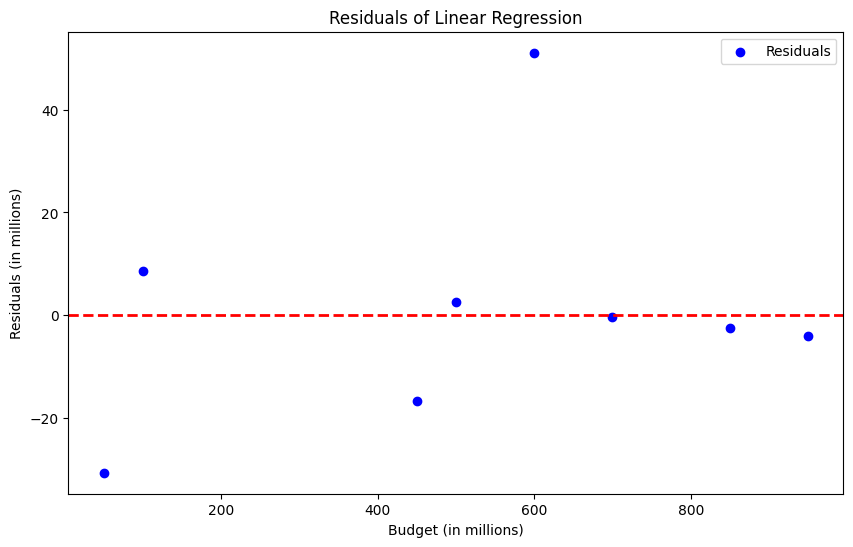

Residuals:
8    -16.658416
16    -2.599010
0    -30.717822
18    -4.084158
11    51.113861
9      2.599010
13    -0.371287
1      8.539604
Name: Box_Office, dtype: float64


In [19]:
df = pd.DataFrame(data)

# Features and target variable
X = df[['Budget']]
y = df['Box_Office']

# Step 2: Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Perform Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting the test set results
y_pred = model.predict(X_test)

# Step 4: Calculate Residuals
residuals = y_test - y_pred

# Step 5: Plot the Residuals
plt.figure(figsize=(10, 6))
plt.scatter(X_test, residuals, color='blue', label='Residuals')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Residuals of Linear Regression')
plt.xlabel('Budget (in millions)')
plt.ylabel('Residuals (in millions)')
plt.legend()
plt.show()

# Print the residuals
print("Residuals:")
print(residuals)

In [20]:
from sklearn.metrics import mean_squared_error

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 492.12


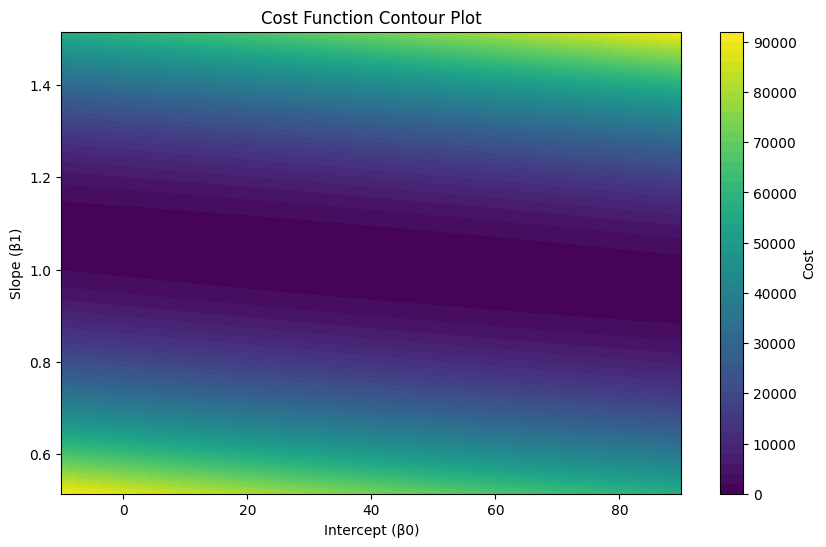

In [21]:
df = pd.DataFrame(data)

# Features and target variable
X = df[['Budget']]
y = df['Box_Office']

# Step 2: Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Perform Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting the test set results
y_pred = model.predict(X_test)

# Step 4: Calculate the Cost Function
def compute_cost(X, y, beta_0, beta_1):
    m = len(y)
    total_cost = np.sum((beta_0 + beta_1 * X - y) ** 2) / (2 * m)
    return total_cost

# Generate a range of values for beta_0 and beta_1
beta_0_range = np.linspace(model.intercept_ - 50, model.intercept_ + 50, 100)
beta_1_range = np.linspace(model.coef_[0] - 0.5, model.coef_[0] + 0.5, 100)

# Calculate the cost for each combination of beta_0 and beta_1
cost_values = np.zeros((len(beta_0_range), len(beta_1_range)))

for i in range(len(beta_0_range)):
    for j in range(len(beta_1_range)):
        cost_values[i, j] = compute_cost(X_train.values.flatten(), y_train.values, beta_0_range[i], beta_1_range[j])

# Plot the cost function
beta_0_grid, beta_1_grid = np.meshgrid(beta_0_range, beta_1_range)
plt.figure(figsize=(10, 6))
plt.contourf(beta_0_grid, beta_1_grid, cost_values.T, levels=50, cmap='viridis')
plt.colorbar(label='Cost')
plt.xlabel('Intercept (β0)')
plt.ylabel('Slope (β1)')
plt.title('Cost Function Contour Plot')
plt.show()